In [21]:
# read in the data file 
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import progressbar
from matplotlib.pyplot import plot

fname = '../../data/cexport.csv'
df = pd.read_csv(fname)

df.columns

Index(['Unnamed: 0', 'AU200_AUD_close', 'AU200_AUD_high', 'AU200_AUD_low',
       'AU200_AUD_open', 'AU200_AUD_vol', 'AUD_CAD_close', 'AUD_CAD_high',
       'AUD_CAD_low', 'AUD_CAD_open',
       ...
       'XPT_USD_high', 'XPT_USD_low', 'XPT_USD_open', 'XPT_USD_vol',
       'ZAR_JPY_close', 'ZAR_JPY_high', 'ZAR_JPY_low', 'ZAR_JPY_open',
       'ZAR_JPY_vol', 'date'],
      dtype='object', length=622)

In [22]:
df['EUR_USD_high'].tail()

552    1.16982
553    1.17247
554    1.17154
555    1.17849
556    1.18031
Name: EUR_USD_high, dtype: float64

In [23]:
str(df.shape)
#TODO: Data cleaning. There are in some circumstances weekend candles included. 
#I think this happens when the market opens when it still sunday night in GMT

# drop the date column

df.drop(['date'],1,inplace = True)

(556, 621)
(556,)
Cleaning training data


(525, 621)
(525,)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RMSE: 41.66615373824028 %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RMSE: 31.892808287700813 %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RMSE: 52.63872829946858 %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


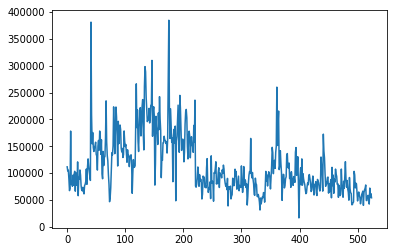

In [24]:
#prepare training and validation data
def getrmse(y1, y2):
    return np.sqrt(np.mean((2*(y1-y2)/(y1+y2))**2))
pcol = 'USD_JPY_vol' # we will try to predict the next day tick volume traded in the USD_JPY spot market
x = np.array(df.values)
y = np.array(df[pcol].values)
y = y[1:] # drop first line
x = x[:-1,:]# drop the last line
print(x.shape)
print(y.shape)

kf = KFold(n_splits=3)
regr = RandomForestRegressor(verbose = 1)

#remove missing lines from the training data
i = 0
print('Cleaning training data')
bar = progressbar.ProgressBar(maxval=y.shape[0], \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
l = 0
while i < y.shape[0]:
    if y[i] < 0: # missing values are marked with -1
        y = np.delete(y,i)
        x = np.delete(x, (i), axis = 0)
    else:
        i += 1
    bar.update(l)
    l+=1
print(x.shape)
print(y.shape)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(x_train, y_train)
    yp = regr.predict(x_test)
    print('RMSE: ' + str(100*getrmse(yp,y_test)) + ' %')
    
    

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


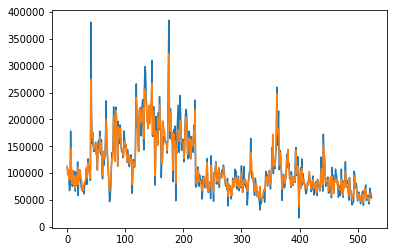

In [26]:
# refit on the whole series

regr.fit(x,y)
yp = regr.predict(x)
xrange = range(y.shape[0])

plot(xrange, y, xrange, yp)